In [0]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [1]:
!pip install tensorflow-gpu==2.1

     |████████████████████████████████| 421.8MB 17kB/s 
     |████████████████████████████████| 450kB 40.4MB/s 
     |████████████████████████████████| 3.8MB 44.8MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goo

In [4]:
df = pd.read_csv("/content/drive/My Drive/prices.csv")
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df.tail()

,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30 00:00:00,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [6]:
#df.groupby('symbol').nunique()
df.symbol.value_counts()

RIG     1762
AN      1762
TIF     1762
EOG     1762
BLL     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [7]:
df =  df.loc[df['symbol'] == 'FCX']
df.head()

,date,symbol,open,close,low,high,volume
415,2010-01-04,FCX,82.610001,83.459999,82.550003,83.599998,18082400.0
883,2010-01-05,FCX,83.510002,83.959999,83.129997,84.500000,17313000.0
1351,2010-01-06,FCX,84.860001,87.309998,84.769997,87.980003,30691200.0
1819,2010-01-07,FCX,86.529999,85.639999,85.010002,86.800003,19499200.0
2287,2010-01-08,FCX,85.940002,88.099998,84.809998,88.199997,21313200.0


In [0]:
def data_gen(dataset, start_index, end_index, history_size, target_size):
                                                      data = []
                                                      labels = []

                                                      start_index = start_index + history_size
                                                      if end_index is None:
                                                        end_index = len(dataset) - target_size

                                                      for i in range(start_index, end_index):
                                                        indices = range(i-history_size, i)
                                                        data.append(dataset[indices])
                                                        labels.append(dataset[i+target_size])
                                                      return np.array(data), np.array(labels)


In [9]:
TRAIN_SPLIT = 1409
chosen_features = ['open', 'close', 'low', 'high', 'volume']
features = df[chosen_features]
features.index = df['date']
features.head()



,open,close,low,high,volume
date,,,,,
2010-01-04,82.610001,83.459999,82.550003,83.599998,18082400.0
2010-01-05,83.510002,83.959999,83.129997,84.500000,17313000.0
2010-01-06,84.860001,87.309998,84.769997,87.980003,30691200.0
2010-01-07,86.529999,85.639999,85.010002,86.800003,19499200.0
2010-01-08,85.940002,88.099998,84.809998,88.199997,21313200.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f514e181dd8>,
      dtype=object)

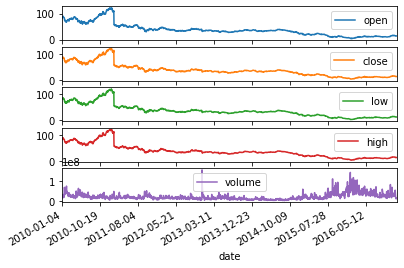

In [10]:
features.plot(subplots=True)


In [0]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)


In [0]:
#normalised dataset
dataset = (dataset-data_mean)/data_std


In [0]:
past_history = 7
future_target = 1

#generate data

x_train, y_train = data_gen(dataset, 0, TRAIN_SPLIT,past_history,future_target)
x_val, y_val = data_gen(dataset, TRAIN_SPLIT, None,past_history,future_target)


In [14]:
print(x_train[0]) # first training feature

[[ 1.70203234  1.74230212  1.75928452  1.6962822  -0.03523825]
 [ 1.74213937  1.76458078  1.78555722  1.73584627 -0.10974465]
 [ 1.8022998   1.91384772  1.85984629  1.88882712  1.18576022]
 [ 1.87672044  1.83943706  1.87071809  1.83695435  0.10196042]
 [ 1.85042822  1.949048    1.86165827  1.89849805  0.27762276]
 [ 2.03001832  1.94860234  1.9644854   2.00180426  1.2090011 ]
 [ 1.87270987  1.80067211  1.80095879  1.82860187  1.52226883]]


In [0]:
BATCH_SIZE = 16
BUFFER_SIZE = 10000

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.batch(BATCH_SIZE).repeat()



In [16]:
print ('Single window of past history : {}'.format(x_train[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train[0].shape))


Single window of past history : (7, 5)

 Target temperature to predict : (5,)


In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(32,return_sequences=True,input_shape=x_train.shape[-2:]))
model.add(tf.keras.layers.LSTM(16, activation='relu'))
model.add(tf.keras.layers.Dense(5))

model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 7, 32)             4864      
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 85        
Total params: 8,085
Trainable params: 8,085
Non-trainable params: 0
_________________________________________________________________


In [18]:
for x, y in val_data.take(1):
     print(model.predict(x))


[[-0.24504007 -0.01142123 -0.25901568  0.12238419  0.02542872]
 [-0.24076477 -0.01211479 -0.2615302   0.12803501  0.02131735]
 [-0.23277181 -0.01145139 -0.262083    0.13420218  0.01499896]
 [-0.2329783  -0.00995533 -0.26219913  0.13021773  0.01588137]
 [-0.2371718  -0.00823632 -0.26129228  0.12449294  0.01353461]
 [-0.24834819 -0.00788105 -0.25966313  0.11751993  0.00717231]
 [-0.24913304 -0.00858098 -0.26059914  0.1180531  -0.00255991]
 [-0.21078503 -0.02719264 -0.2562878   0.13272437 -0.03250003]
 [-0.18410967 -0.05746623 -0.25413328  0.15399477 -0.05355155]
 [-0.17583421 -0.05503941 -0.25459975  0.15153447 -0.04895302]
 [-0.18651119 -0.04859154 -0.2570528   0.13950478 -0.04013835]
 [-0.20234701 -0.04117179 -0.26460826  0.12524875 -0.02821458]
 [-0.22190078 -0.03511906 -0.27389356  0.11286396 -0.01920768]
 [-0.24169293 -0.02741724 -0.2808899   0.1005327  -0.0020641 ]
 [-0.24015743 -0.01887481 -0.26969618  0.10555592 -0.01423724]
 [-0.23831345 -0.00855526 -0.25467116  0.10664229 -0.01

In [ ]:
history = model.fit(train_data, epochs=100,steps_per_epoch=200,validation_data=val_data,validation_steps=50)


In [0]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()


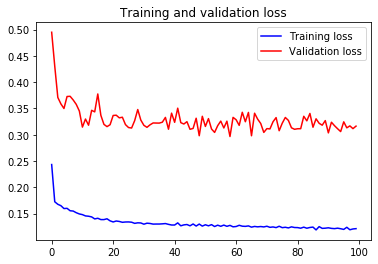

In [21]:
plot_train_history(history, 'Training and validation loss')


In [0]:
def create_time_steps(length):
  return list(range(-length, 0))



In [0]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out), np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out), np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()


[-1.6153936 -1.6593926 -1.6439698 -1.6312311  2.2956858]
tf.Tensor([-1.53415544 -1.5437995  -1.54567355 -1.53389682  2.58452239], shape=(5,), dtype=float64)


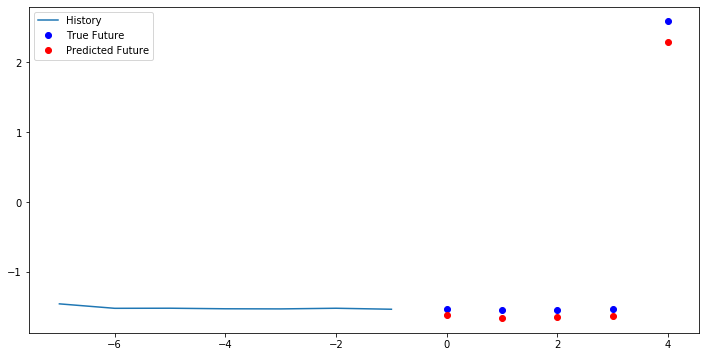

[-1.5711118 -1.6150296 -1.5866313 -1.5299625  1.4508512]
tf.Tensor([-1.48157073 -1.4791914  -1.48723885 -1.47147365  0.94929393], shape=(5,), dtype=float64)


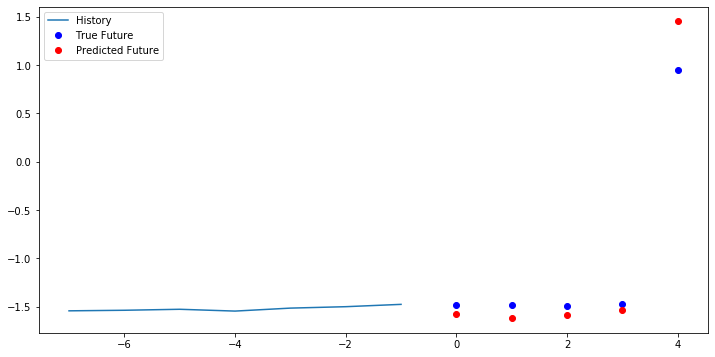

[-1.5914218 -1.6378998 -1.6144009 -1.5851867  1.7849469]
tf.Tensor([-1.46998427 -1.44933801 -1.4682136  -1.45432926  3.43652344], shape=(5,), dtype=float64)


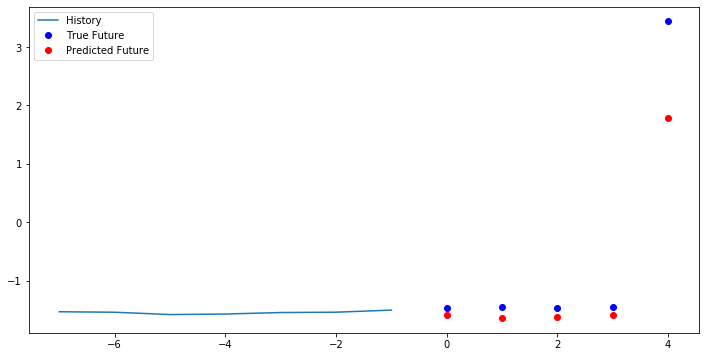

In [34]:
for x, y in val_data.take(3):
  print(model.predict(x)[0])
  print(y[0])
  multi_step_plot(x[0], y[0], model.predict(x)[0])


In [0]:
model.save('time_series_forcasting.h5') 

In [35]:
new_model = tf.keras.models.load_model('time_series_forcasting.h5')
new_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 32)             4864      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 5)                 85        
Total params: 8,085
Trainable params: 8,085
Non-trainable params: 0
_________________________________________________________________
